# Exploratory Data Analysis (EDA) of trends in user-movie preferences over the years

### 1. Load and Inspect Data

In [45]:
import os
import sys
# Set the working directory to the project root
os.chdir("/Users/isaacgonzales/Desktop/Sample")
sys.path.append(os.path.abspath("src"))
from src.data_fetching import load_imdb_data  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load required IMDb datasets
title_basics = load_imdb_data("title_basics")
title_ratings = load_imdb_data("title_ratings")

In [46]:
# Filter only movies and TV movies
title_basics = title_basics[title_basics["titleType"].isin(["movie", "tvMovie"])]

# Merge datasets and remove rows with missing values in key columns
df = title_basics.merge(title_ratings, on="tconst", how="inner")
df = df.dropna(subset=["startYear", "averageRating", "numVotes"])

# Display structure of the cleaned dataset
print("Cleaned Merged Data:")
print(df.info())

Cleaned Merged Data:
<class 'pandas.core.frame.DataFrame'>
Index: 381574 entries, 0 to 381611
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          381574 non-null  string 
 1   titleType       381574 non-null  string 
 2   primaryTitle    381573 non-null  string 
 3   originalTitle   381573 non-null  string 
 4   isAdult         381574 non-null  boolean
 5   startYear       381574 non-null  Int64  
 6   endYear         0 non-null       Int64  
 7   runtimeMinutes  339900 non-null  Int64  
 8   genres          368942 non-null  string 
 9   averageRating   381574 non-null  float64
 10  numVotes        381574 non-null  Int64  
dtypes: Int64(4), boolean(1), float64(1), string(5)
memory usage: 34.2 MB
None


### 2. Analyze Trends in Average Ratings Over Time

In [47]:
# Group by startYear to compute trends
rating_per_year = df.groupby("startYear")["averageRating"].mean()
votes_per_year = df.groupby("startYear")["numVotes"].sum()
movies_per_year = df["startYear"].value_counts().sort_index()

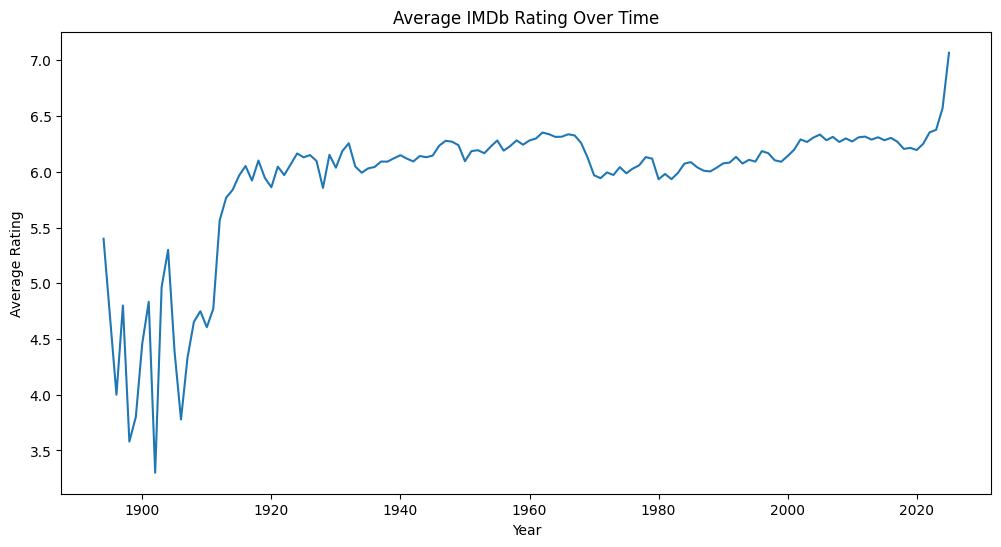

In [48]:
# Averate rating over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=rating_per_year.index, y=rating_per_year.values)
plt.title("Average IMDb Rating Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

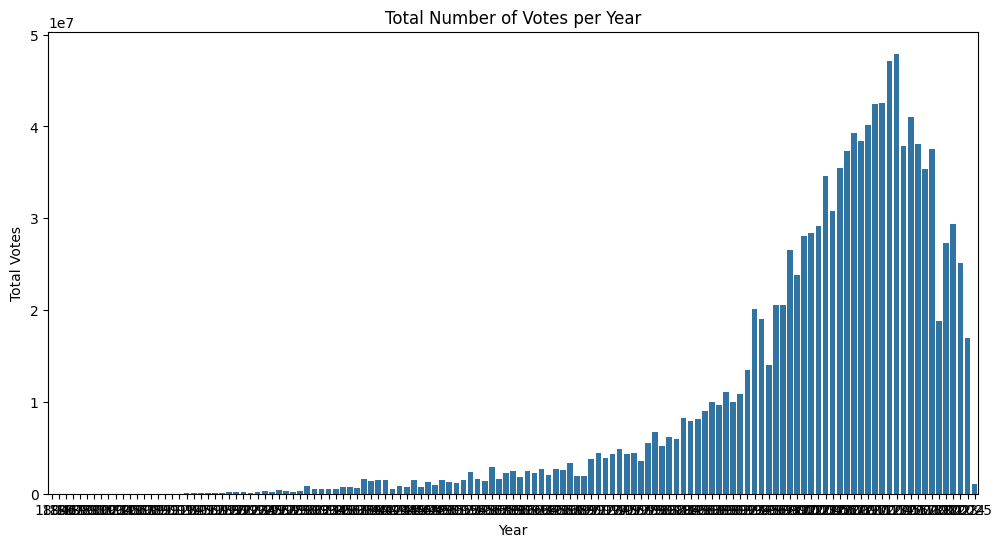

In [49]:
# Vote counts per title over time
plt.figure(figsize=(12, 6))
sns.barplot(x=votes_per_year.index, y=votes_per_year.values)
plt.title("Total Number of Votes per Year")
plt.xlabel("Year")
plt.ylabel("Total Votes")
plt.show()

### 3. Analyze Genre Preferences Over Time

In [50]:
# Explode genres and group by startYear
df = df.copy()
df["genres"] = df["genres"].str.split(",")
exploded_genres = df.explode("genres")
genre_trends = exploded_genres.groupby(["startYear", "genres"]).size().reset_index(name="count")


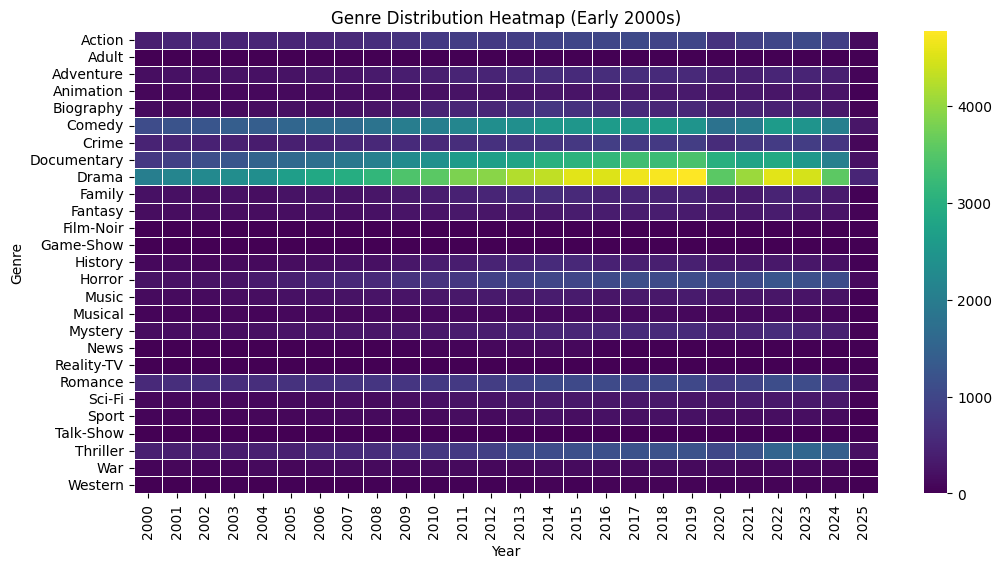

In [55]:
# Tabulate genre distribution over time
genre_pivot = genre_trends.pivot(index="startYear", columns="genres", values="count").fillna(0)

# Heatmap of genre distribution (early 2000s only)
genre_pivot_20s = genre_pivot.loc[(genre_pivot.index >= 2000) & (genre_pivot.index < 2026)]
if not genre_pivot_20s.empty:
    plt.figure(figsize=(12, 6))
    sns.heatmap(genre_pivot_20s.T, cmap="viridis", linewidths=0.5)
    plt.title("Genre Distribution Heatmap (Early 2000s)")
    plt.ylabel("Genre")
    plt.xlabel("Year")
    plt.show()
else:
    print("No genre data available for the early 2000s.")

### 4. Analyze Runtime Trends Over Time

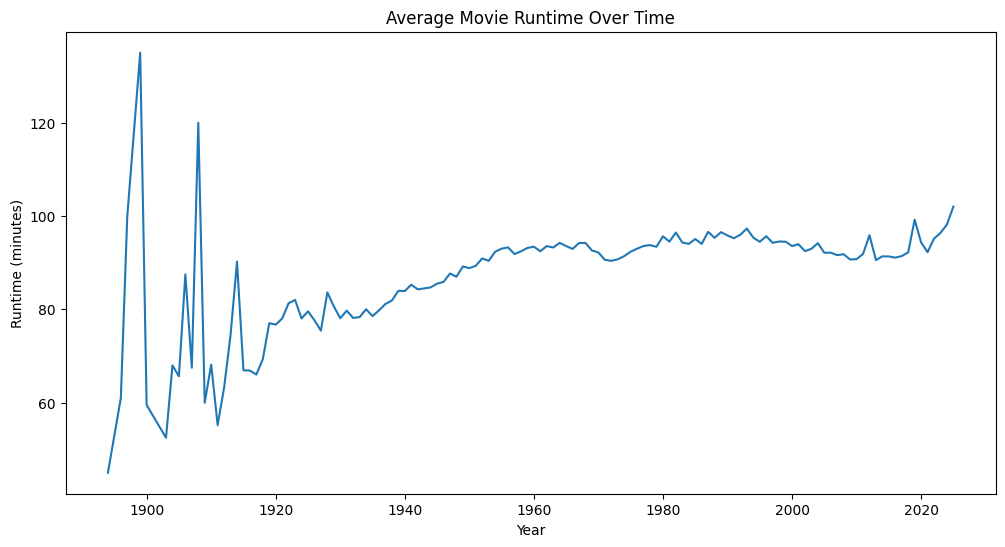

In [56]:
# Compute average runtime per year
runtime_trends = df.groupby("startYear")["runtimeMinutes"].mean()

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x=runtime_trends.index, y=runtime_trends.values)
plt.title("Average Movie Runtime Over Time")
plt.xlabel("Year")
plt.ylabel("Runtime (minutes)")
plt.show()

### 5. Identify Blockbuster Trends

In [57]:
# Define blockbusters as top 5% by numVotes per year
df["is_blockbuster"] = df.groupby("startYear")["numVotes"].transform(lambda x: x >= x.quantile(0.95))
blockbusters = df[df["is_blockbuster"]]

# Compute blockbuster count per year
blockbuster_per_year = blockbusters["startYear"].value_counts().sort_index()

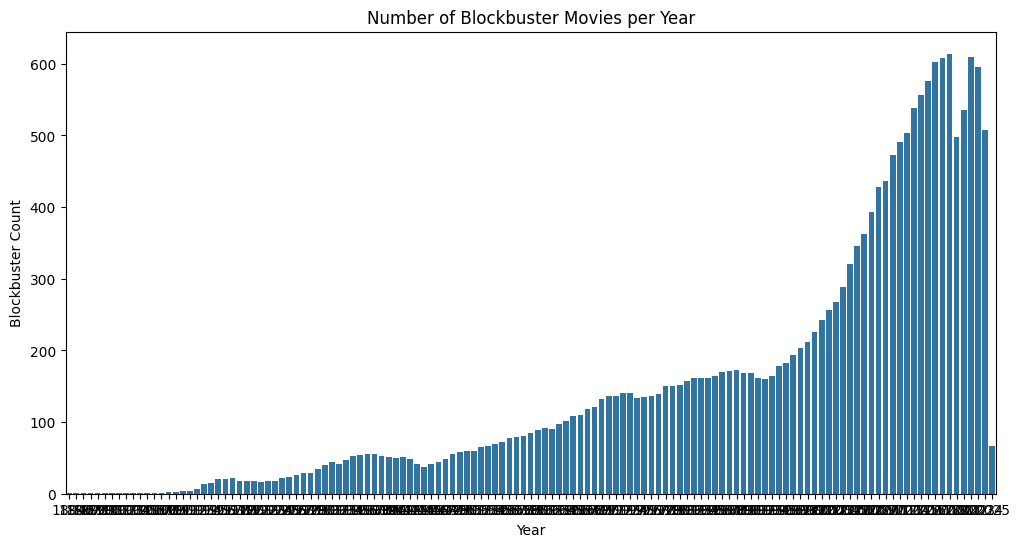

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=blockbuster_per_year.index, y=blockbuster_per_year.values)
plt.title("Number of Blockbuster Movies per Year")
plt.xlabel("Year")
plt.ylabel("Blockbuster Count")
plt.show()

### 6. Summary and Insights

Trends in IMDb Ratings, Genres, and Blockbuster Movies Over Time:
- Average ratings remained stable around 6.0 from 1920 to 2020, with a noticeable rise in recent years.
- Drama has consistently been the dominant genre, showing a steady upward trend over time.
- Comedy and Documentary films also rank among the most prevalent genres, following Drama.
- No significant increase has been observed in the average movie runtime.
- The blockbuster metric may be influenced by the overall rise in user numbers, potentially introducing bias.